## Задание 1

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [54]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(target, columns=["price"])

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [59]:
from sklearn.manifold import TSNE

In [60]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42, init='random')

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


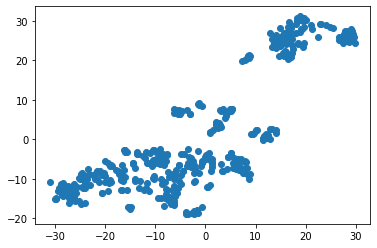

In [61]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

## Задание 2

In [62]:
from sklearn.cluster import KMeans

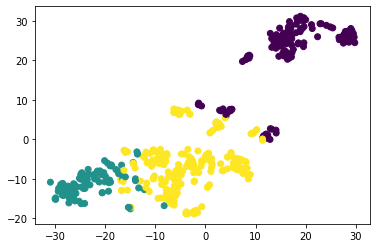

In [63]:
kmeans = KMeans(n_clusters=3, random_state=100, max_iter=100)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [65]:
y_train[labels_train == 0].mean()

price    16.165354
dtype: float64

In [66]:
y_train[labels_train == 1].mean()

price    27.788372
dtype: float64

In [67]:
y_train[labels_train == 2].mean()

price    24.958115
dtype: float64

In [69]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

10.797028425196851

In [71]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

0.07356558139534884

In [72]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.4216602094240837

## Задание 3

In [74]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

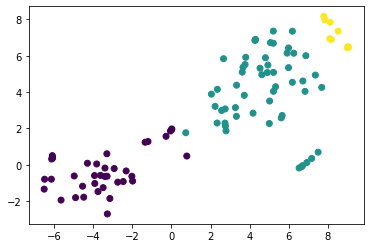

In [75]:
labels_test = kmeans.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [76]:
y_test[labels_test == 0].mean()

price    16.710526
dtype: float64

In [77]:
y_test[labels_test == 1].mean()

price    22.690909
dtype: float64

In [78]:
y_test[labels_test == 2].mean()

price    34.311111
dtype: float64

In [79]:
X_test.loc[labels_test == 0, 'CRIM'].mean()

9.419181842105264

In [80]:
X_test.loc[labels_test == 1, 'CRIM'].mean()

0.2192969090909091

In [81]:
X_test.loc[labels_test == 2, 'CRIM'].mean()

0.04070333333333334